# How to create a meaningful EDA

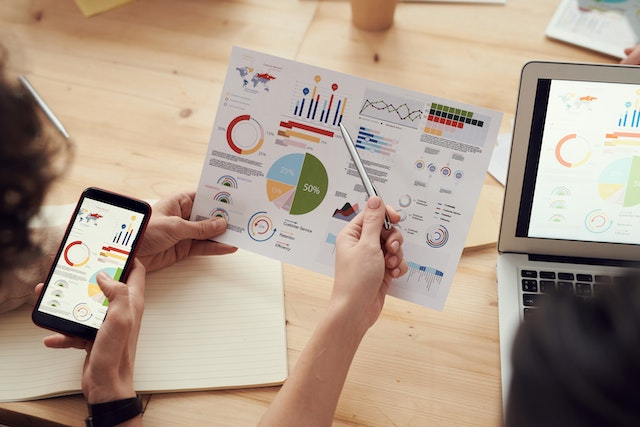

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")

# Table of Contents

<a id="toc"></a>
- [1. Set-up](#1)
    - [1.1 Import Libraries](#1.1)
    - [1.2 Import Data](#1.2)
    - [1.3 Data Set Characteristics](#1.3)
    - [1.4 Dataset Attributes](#1.4)
- [2. Exploring Train and Test datasets](#2)
    - [2.1 Train dataset - Quick overview](#2.1)
    - [2.2 Train dataset - Basic statistics](#2.2)
    - [2.3 Test dataset - Quick overview](#2.3)
    - [2.4 Test dataset - Basic statistics](#2.4)
- [3. Feature Distribution](#3)
- [4. Data imbalance check - why it is important](#4)
    - [4.1 Imbalanced data requires different approach](#4.1)
    - [2.2 Notebook reference](#4.2)
- [5. Should we delete outliers?](#5)
    - [5.1 Checking for outliers in Train dataset](#5.1)
    - [5.2 Inter Quartile Range (IQR)](#5.2)
    - [5.3 Detecting and dropping outliers](#5.3)
    - [5.4 What have we done?](#5.4)
    - [5.5 Notebook reference](#5.5)
- [6. Dealing with duplicated values](#6)
- [7. Correlations](#7)
- [8. Some more visualisations](#8)
- [9. My other notebooks](#9)

<a id="1"></a>
# <b>1 <span style='color:#F1A424'>|</span> Set-up</b>

<a id="1.1"></a>
## <b>1.1 <span style='color:#F1A424'>Import Libraries</span></b> 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

<a id="1.2"></a>
## <b>1.2 <span style='color:#F1A424'>Import Data</span></b> 

In [3]:
try:
    raw_train = pd.read_csv('/kaggle/input/playground-series-s3e4/train.csv', index_col='id')
    raw_test = pd.read_csv('/kaggle/input/playground-series-s3e4/test.csv', index_col='id')
except:
    raw_train = pd.read_csv('train.csv', index_col='id')
    raw_test = pd.read_csv('test.csv', index_col='id')

<a id="1.3"></a>
## <b>1.3 <span style='color:#F1A424'>Data Set Characteristics</span></b>

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Credit Card Fraud Detection (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note, this base dataset for this competition was much larger than previous Tabular Tuesdays datasets, and thus may contain more artifacts than the last three competitions.

https://www.kaggle.com/competitions/playground-series-s3e4/overview

<a id="1.4"></a>
## <b>1.4 <span style='color:#F1A424'>Dataset Attributes</span></b> 

Dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

* <code>Id</code> - A unique Id for each row.

* <code>Time</code> - Number of seconds elapsed between this transaction and the first transaction in the dataset

* <code>V1-V28</code> - Features after dimensionality reduction to protect user identities and sensitive features

* <code>Amount</code> - Transaction amount

* <code>Class</code> - Target Class (1 for fraudulent transactions, 0 genuine)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="2"></a>
# <b>2 <span style='color:#F1A424'>|</span> Exploring Train and Test datasets</b>

Observations in Train dataset:

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>There are total of 32 columns: 30 continous, 0 categorical, 1 id and 1 target column
<li>There are 219129 rows
<li>Class is the target variable
<li>No missing values
</ul>
</div>

Observations in Test dataset:

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>There are total of 31 columns: 30 continous, 0 categorical and 1 id
<li>There are 146087 rows
<li>No missing values
</ul>
</div>

<a id="2.1"></a>
## <b>2.1 <span style='color:#F1A424'>Train dataset - Quick overview</span></b> 

In [4]:
raw_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


<a id="2.2"></a>
## <b>2.2 <span style='color:#F1A424'>Train dataset - Basic statistics</span></b>

In [5]:
raw_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,...,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,...,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,...,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,...,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,...,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,...,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,...,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


<a id="2.3"></a>
## <b>2.3 <span style='color:#F1A424'>Test dataset - Quick overview</span></b> 

In [6]:
raw_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
id,,,,,,,,,,,,,,,,,,,,,
219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,-0.230126,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,1.068183,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,-1.177858,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,2.079398,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,-0.281749,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


<a id="2.4"></a>
## <b>2.4 <span style='color:#F1A424'>Test dataset - Basic statistics</span></b>

In [7]:
raw_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,...,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000
mean,144637.928166,0.512929,-0.013098,-0.697478,-0.273258,0.321856,-0.050204,0.073419,0.043803,-0.071620,...,-0.056678,0.044729,0.175461,0.018471,0.016029,-0.118352,-0.015199,0.006236,0.002035,66.182463
std,14258.025396,1.628455,1.247749,1.292522,1.365752,1.146215,1.332880,0.946681,0.749513,0.924996,...,0.458364,0.449017,0.710704,0.359597,0.633929,0.479720,0.446154,0.255935,0.174613,153.151535
min,120580.000000,-34.755944,-37.803827,-18.934952,-5.497560,-25.639591,-14.133040,-18.715915,-26.926164,-4.823352,...,-26.412867,-13.087263,-5.392649,-12.814296,-2.789084,-3.361564,-1.743223,-9.412538,-8.262339,0.000000
25%,132698.000000,-0.679988,-0.715885,-1.619268,-1.021205,-0.418547,-0.891441,-0.570042,-0.231824,-0.634695,...,-0.237529,-0.166715,-0.393667,-0.135059,-0.368957,-0.409938,-0.284914,-0.066037,-0.057447,5.990000
50%,144493.000000,0.285798,0.009058,-0.719060,-0.482945,0.306851,-0.372813,0.118545,0.014979,-0.075909,...,-0.096729,0.058393,0.250169,0.017835,0.029727,-0.142325,-0.069342,-0.003539,-0.026955,21.790000
75%,156140.000000,1.974015,0.827420,0.073874,0.369725,0.955997,0.302724,0.734503,0.296969,0.513770,...,0.065753,0.244817,0.749555,0.167514,0.562138,0.182937,0.216632,0.069334,0.066954,66.000000
max,172790.000000,2.452901,12.390128,4.492640,11.232928,24.352818,16.596635,27.023955,12.098322,7.888980,...,15.829261,15.333546,5.771245,17.481609,4.541724,4.555960,3.374748,12.673968,13.093229,4630.600000


<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3"></a>
# <b>3 <span style='color:#F1A424'>|</span> Feature Distribution</b>

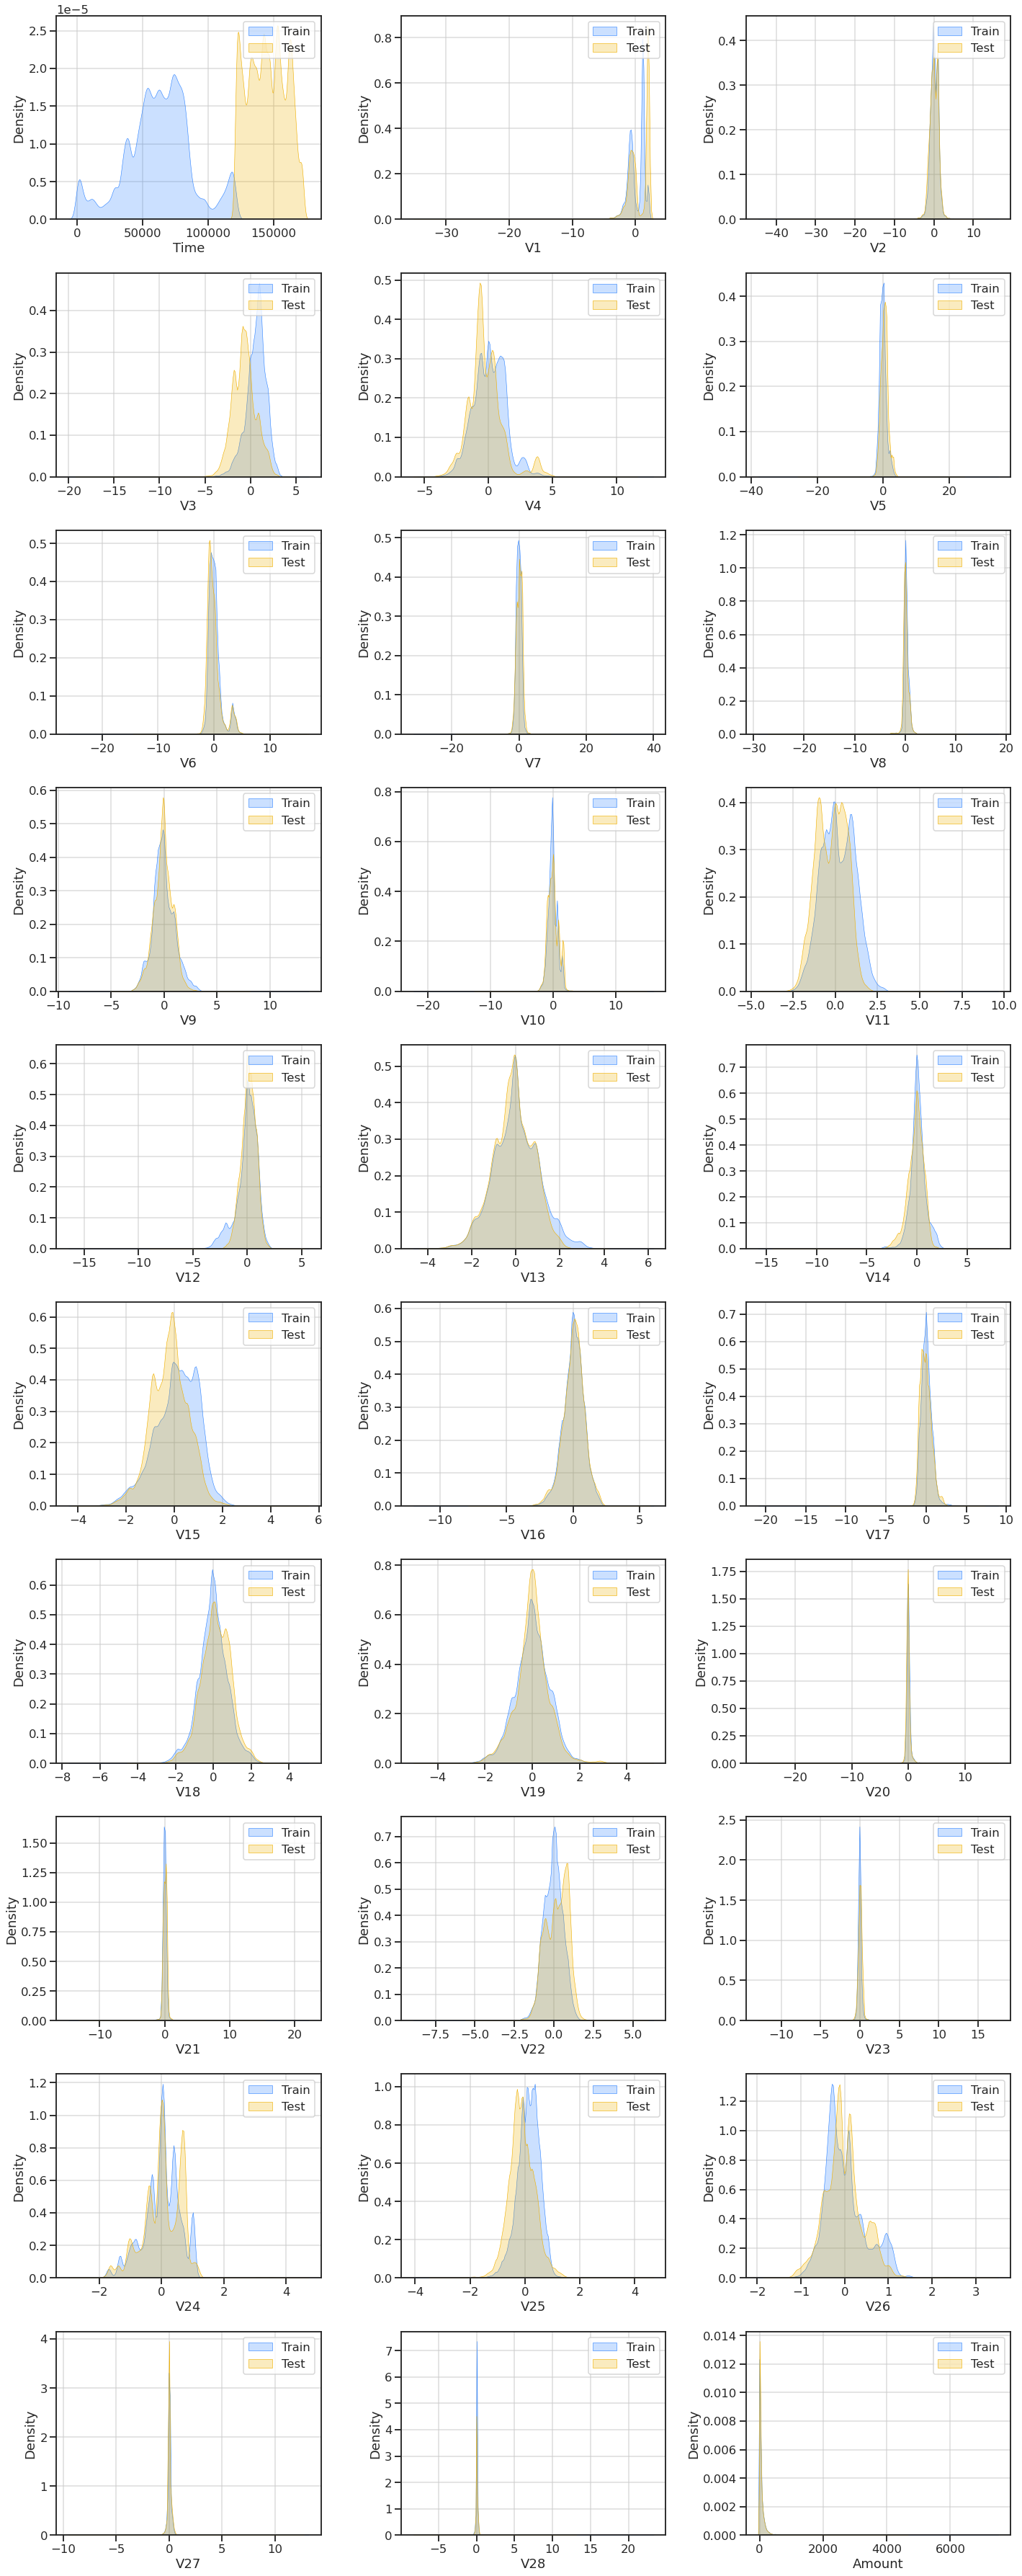

In [8]:
numeric_columns = (list(raw_train.loc[:, 'Time':'Amount']))

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = raw_train, label = "Train")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = raw_test, label = "Test")      
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

Distributions of 'Time' are very different for train and test set. This could cause serious problem, because the algorithm will be able distinct between those sets more easily.

We can convert the Time by breaking it down into an hour of the dayfeature or drop it.

In [9]:
train_df = raw_train.drop('Time', axis=1)
test_df = raw_test.drop('Time', axis=1)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="4"></a>
# <b>4 <span style='color:#F1A424'>|</span> Data imbalance check - why it is important</b>

In [10]:
palette = ["#ADD8E6","#EFB000"]     

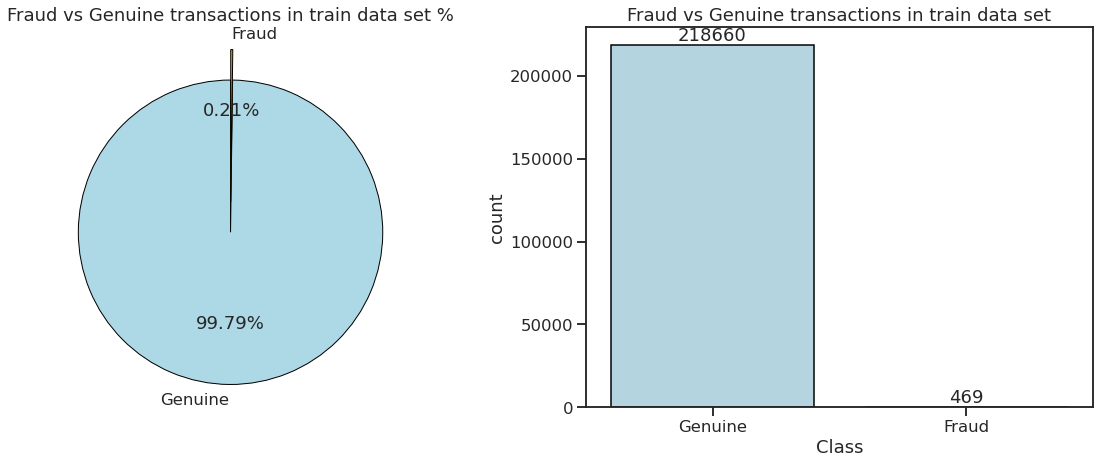

In [11]:
l1 = list(train_df['Class'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Genuine','Fraud'], 
        autopct = '%1.2f%%',
        startangle = 90,
        explode = (0.1,0.1),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Fraud vs Genuine transactions in train data set %');

plt.subplot(1,2,2)
ax = sns.countplot(data = train_df, 
                   x='Class', 
                   palette = palette, 
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Genuine','Fraud'])
    
plt.title('Fraud vs Genuine transactions in train data set')
plt.show()

<a id="4.1"></a>
## <b>4.1 <span style='color:#F1A424'>Imbalanced data requires different approach</span></b> 

We have **99,8%** of Genuine transactions (218,660) and only **0,214%** (469) of fraud transactions!

This means that a blind guess (bet on Genuine) would give us accuracy of **99,8%**.


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>Never use accuracy score as a metric with imbalanced datasets - it will be usually very high and misleading (you can use AUC - ROC, Recall, F1 score instead).</li>
    <li>Consider to take advantage of undersampling or oversampling techniques.</li>
    <li>Use stratified splitting during train-test split.</li>
    <li>Be extra careful when dealing with outliers (you can delete meaningull information).</li>
</ul>
</div>

<a id="4.2"></a>
## <b>4.2 <span style='color:#F1A424'>Notebook reference</span></b> 

> Check this notebook for **<mark style="background-color:#FFC300;color:white;border-radius:5px;opacity:1.0">MUCH more information</mark>** **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">about dealing with imbalanced datasets</mark>**:

https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="5"></a>
# <b>5 <span style='color:#F1A424'>|</span> Should we delete outliers?</b>

<a id="5.1"></a>
## <b>5.1 <span style='color:#F1A424'>Checking for outliers in Train dataset</span></b> 

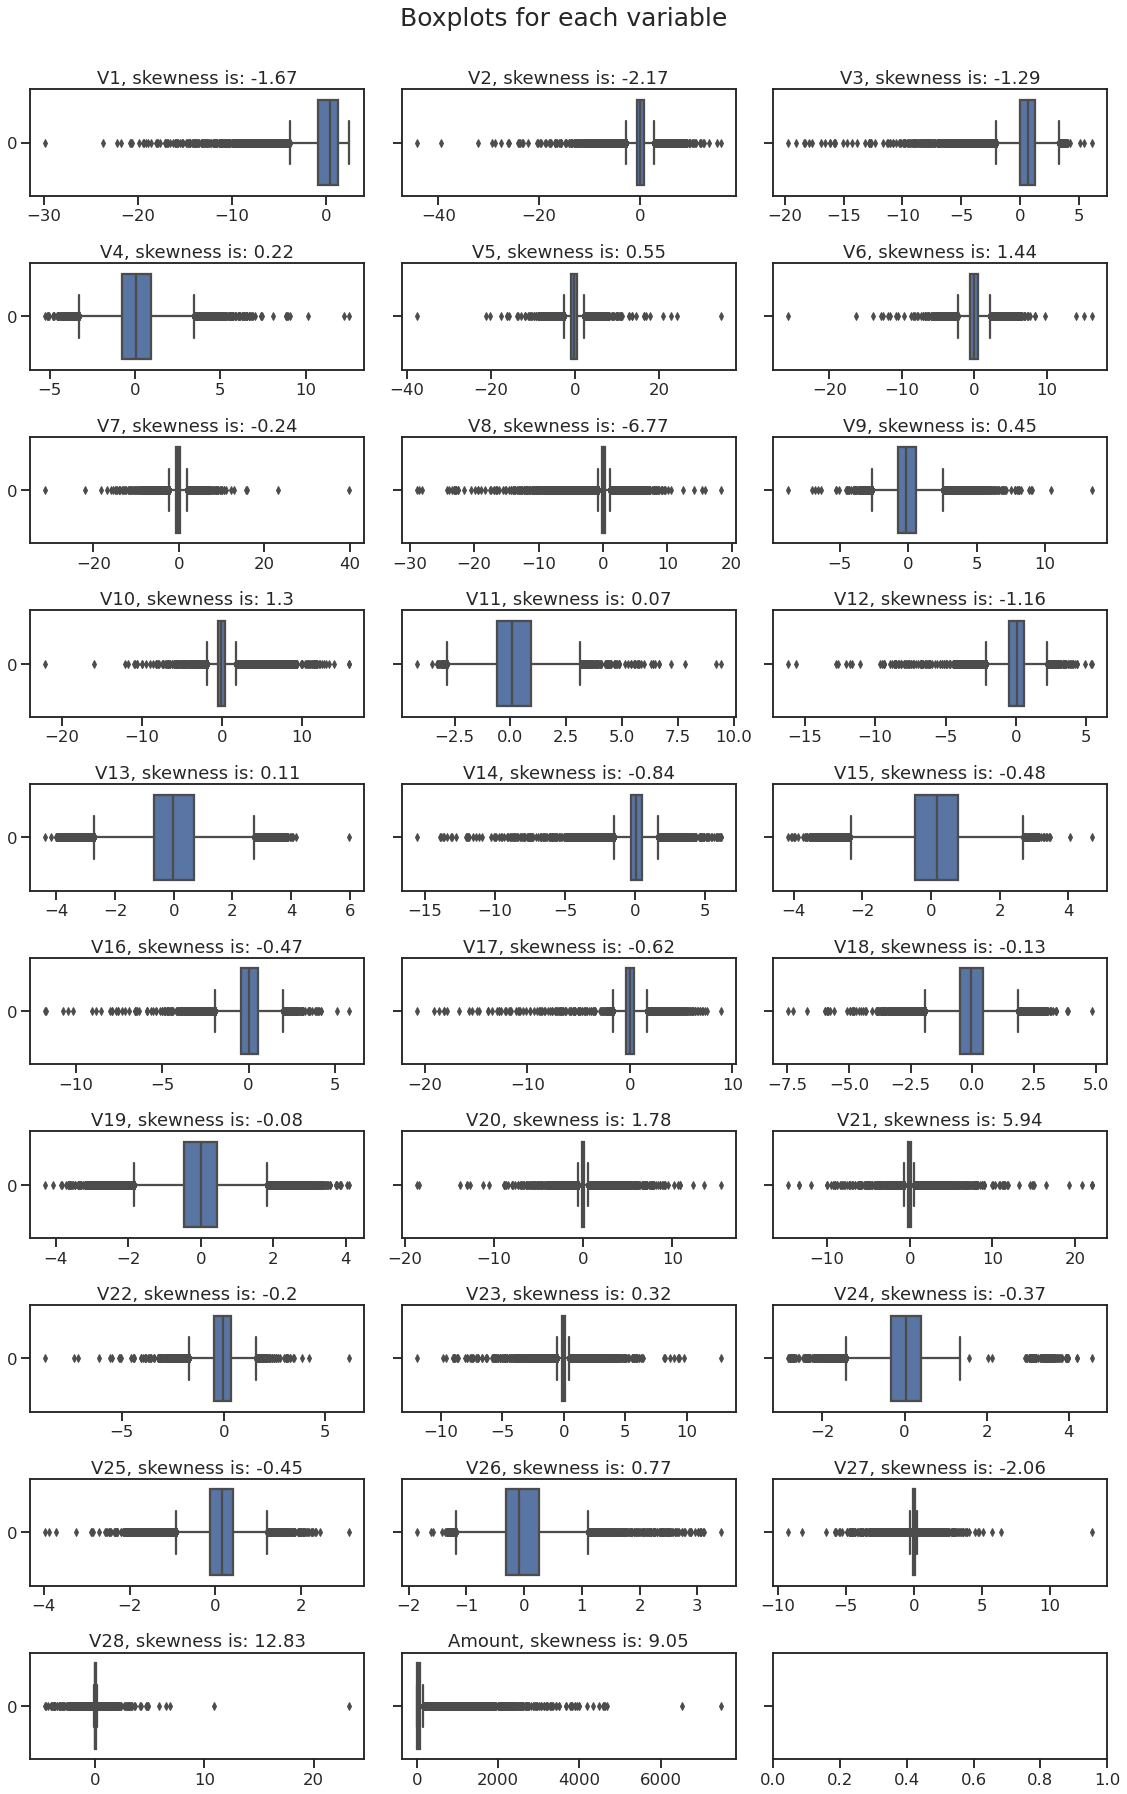

In [12]:
numeric_columns = (list(train_df.loc[:, 'V1':'Amount']))

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=train_df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

It looks like we have a significant problems with outliers:

* huge outliers;

* higly skeved data;

* a lot of outliers.

<a id="5.2"></a>
## <b>5.2 <span style='color:#F1A424'>Inter Quartile Range (IQR)</span></b>

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR = Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

In [13]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

<a id="5.3"></a>
## <b>5.3 <span style='color:#F1A424'>Detecting and dropping outliers</span></b>

In [14]:
Outliers_IQR = IQR_method(train_df,1,numeric_columns)
df_out = train_df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 20617


<a id="5.4"></a>
## <b>5.4<span style='color:#F1A424'>What have we done?</span></b>

In [15]:
print ('The amount of frauds in df before dropping outliers: ', len(train_df[train_df['Class'] == 1]))
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['Class'] == 1]))

The amount of frauds in df before dropping outliers:  469
The amount of frauds in df after dropping outliers:  188


By deleting outliers we dropped about **<mark style="background-color:#FFC300;color:white;border-radius:5px;opacity:1.0">40%</mark>** of the very important data! **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">We shouldn't do that!</mark>**

We have a few options here, but for that study we will just come back to the stage just before dropping outliers. Very interesting option here is to create a new dataframe consisting only outliers. You can check the results of this approach here:

https://www.kaggle.com/code/marcinrutecki/credit-card-fraud-detection-tensorflow

<a id="5.5"></a>
## <b>5.5 <span style='color:#F1A424'>Notebook reference</span></b> 

> Check this notebook for **<mark style="background-color:#FFC300;color:white;border-radius:5px;opacity:1.0">oulier detection methods</mark>** **</mark>**:

https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="6"></a>
# <b>6 <span style='color:#F1A424'>|</span> Dealing with duplicated values</b>

In [16]:
print('Number of duplicated values in dataset: ', train_df.duplicated().sum())

Number of duplicated values in dataset:  94


In [17]:
df = train_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


Let's check if we dropped any fraud transactions. This is important because if so, we should think one more time if they are duplicates in real.

In [18]:
print ('The amount of frauds in df before dropping duplicates: ', len(train_df[train_df['Class'] == 1]))
print ('The amount of frauds in df after dropping duplicates: ', len(df[df['Class'] == 1]))

The amount of frauds in df before dropping duplicates:  469
The amount of frauds in df after dropping duplicates:  469


As we can see we haven't dropped any important data.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="7"></a>
# <b>7 <span style='color:#F1A424'>|</span> Correlations</b>

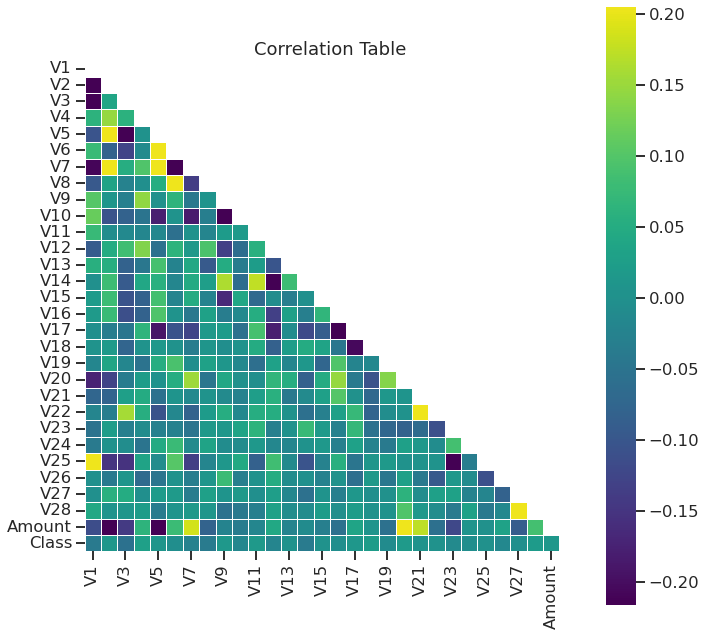

In [19]:
plt.figure(figsize = (11,11))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, cmap="viridis",linewidths = .6)
plt.title('Correlation Table')
plt.show()

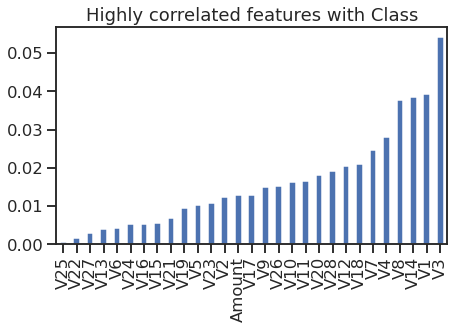

In [20]:
plt.figure(figsize=(7,4))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="8"></a>
# <b>8 <span style='color:#F1A424'>|</span> Some more visualisations</b>

<Figure size 720x720 with 0 Axes>

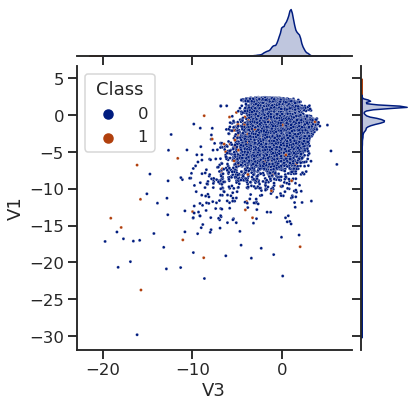

In [21]:
plt.figure(figsize=(10,10))
sns.jointplot(x='V3', y='V1',hue='Class', data=df, palette='dark', s=9)

<Figure size 720x720 with 0 Axes>

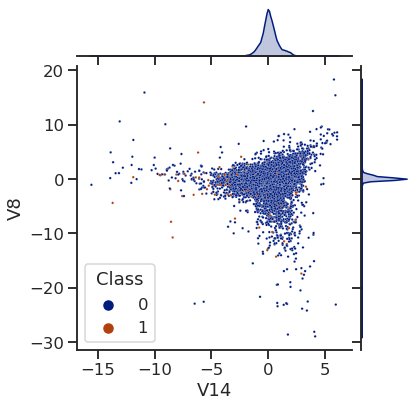

In [22]:
plt.figure(figsize=(10,10))
sns.jointplot(x='V14', y='V8',hue='Class', data=df, palette='dark', s=6)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="9"></a>
# <b>9 <span style='color:#F1A424'>|</span> My other notebooks</b>

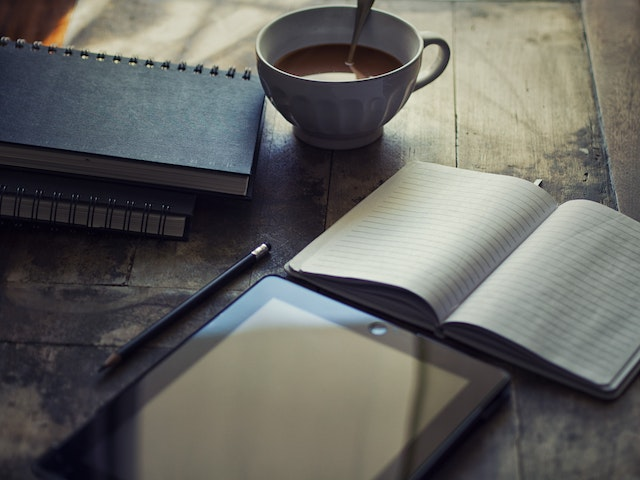

GridSearchCV + KFold CV: The Right Way

https://www.kaggle.com/code/marcinrutecki/gridsearchcv-kfold-cv-the-right-way

Voting Classifier for Better Results

https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results

SMOTE and Tomek Links for imbalanced data

https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data

Best techniques and metrics for Imbalanced Dataset

https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset

Regression Models Evaluation Metrics

https://www.kaggle.com/code/marcinrutecki/regression-models-evaluation-metrics

Clustering methods - comprehensive study

https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study

Outlier detection methods!

https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods

Multicollinearity - detection and remedies

https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies